# Preiselastizität der Nachfrage

Die Formel für die Berechnung der Preiselastizität der Nachfrage nach
der Durchschnittsmethode lautet:

$$
\eta_{Q,P} = \frac{\%\Delta Q}{\%\Delta P} = \frac{
    \frac{(Q_2 - Q_1)}{\frac{(Q_2 + Q_1)}{ 2}}
    }{
    \frac{(P_2 - P_1)}{\frac{(P_2 + P_1)}{ 2}}}
$$

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv("250828_data.csv")
df

,EK,FK,RoI,FKZS1,FKZS2,FKZS3
0,99,1,0.1,0.02,0.1,0.12
1,90,10,0.1,0.02,0.1,0.12
2,80,20,0.1,0.02,0.1,0.12
3,70,30,0.1,0.02,0.1,0.12
4,60,40,0.1,0.02,0.1,0.12
5,50,50,0.1,0.02,0.1,0.12
6,40,60,0.1,0.02,0.1,0.12
7,30,70,0.1,0.02,0.1,0.12
8,20,80,0.1,0.02,0.1,0.12
9,10,90,0.1,0.02,0.1,0.12


In [14]:
df["BG"] = 10
df

,EK,FK,RoI,FKZS1,FKZS2,FKZS3,BG
0,99,1,0.1,0.02,0.1,0.12,10
1,90,10,0.1,0.02,0.1,0.12,10
2,80,20,0.1,0.02,0.1,0.12,10
3,70,30,0.1,0.02,0.1,0.12,10
4,60,40,0.1,0.02,0.1,0.12,10
5,50,50,0.1,0.02,0.1,0.12,10
6,40,60,0.1,0.02,0.1,0.12,10
7,30,70,0.1,0.02,0.1,0.12,10
8,20,80,0.1,0.02,0.1,0.12,10
9,10,90,0.1,0.02,0.1,0.12,10


In [17]:
df["RoE1"] = (((df["EK"] + df["FK"]) * df["RoI"]) - (df["FK"] * df["FKZS1"])) / df["EK"]
df["RoE2"] = ((df["EK"] + df["FK"]) * df["RoI"] - df["FK"] * df["FKZS2"]) / df["EK"]
df["RoE3"] = ((df["EK"] + df["FK"]) * df["RoI"] - df["FK"] * df["FKZS3"]) / df["EK"]
df["FK_Quote"] = df["FK"] / df["EK"]
df

,EK,FK,RoI,FKZS1,FKZS2,FKZS3,BG,RoE1,RoE2,RoE3,FK_Quote
0,99,1,0.1,0.02,0.1,0.12,10,0.100808,0.1,0.099798,0.010101
1,90,10,0.1,0.02,0.1,0.12,10,0.108889,0.1,0.097778,0.111111
2,80,20,0.1,0.02,0.1,0.12,10,0.120000,0.1,0.095000,0.250000
3,70,30,0.1,0.02,0.1,0.12,10,0.134286,0.1,0.091429,0.428571
4,60,40,0.1,0.02,0.1,0.12,10,0.153333,0.1,0.086667,0.666667
5,50,50,0.1,0.02,0.1,0.12,10,0.180000,0.1,0.080000,1.000000
6,40,60,0.1,0.02,0.1,0.12,10,0.220000,0.1,0.070000,1.500000
7,30,70,0.1,0.02,0.1,0.12,10,0.286667,0.1,0.053333,2.333333
8,20,80,0.1,0.02,0.1,0.12,10,0.420000,0.1,0.020000,4.000000
9,10,90,0.1,0.02,0.1,0.12,10,0.820000,0.1,-0.080000,9.000000


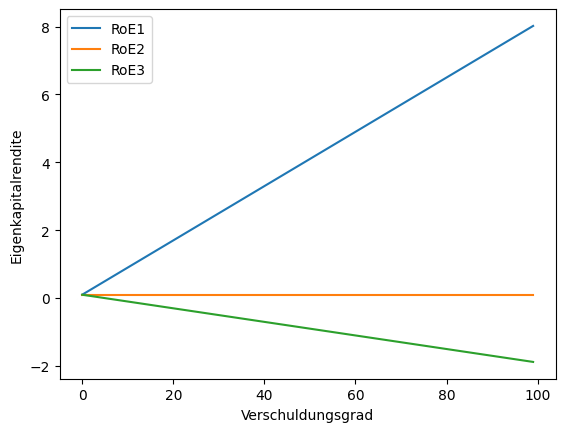

In [27]:
x = df["FK_Quote"]
y1 = df["RoE1"]
y2 = df["RoE2"]
y3 = df["RoE3"]
plt.plot(x, y1, label = 'RoE1')
plt.plot(x, y2, label = 'RoE2')
plt.plot(x, y3, label = 'RoE3')
plt.xlabel("Verschuldungsgrad")
plt.ylabel("Eigenkapitalrendite")
plt.legend()
plt.show()

In [29]:
data = [i for i in range(9,0,-1)]
data

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [32]:
df2 = pd.DataFrame(data, columns=['Preis'])
df2['Menge'] = df2['Preis'] * -1 + 10
df2

,Preis,Menge
0,9,1
1,8,2
2,7,3
3,6,4
4,5,5
5,4,6
6,3,7
7,2,8
8,1,9


In [40]:
df2['PE'] = (((((df2['Menge']+1)-df2['Menge'])/(((df2['Menge']+1)+df2['Menge']))/2)) /
             (((df2['Preis']-1)-df2['Preis'])/((df2['Preis']-1)+df2['Preis']))/2)
df2

,Preis,Menge,PE
0,9,1,-1.416667
1,8,2,-0.750000
2,7,3,-0.464286
3,6,4,-0.305556
4,5,5,-0.204545
5,4,6,-0.134615
6,3,7,-0.083333
7,2,8,-0.044118
8,1,9,-0.013158


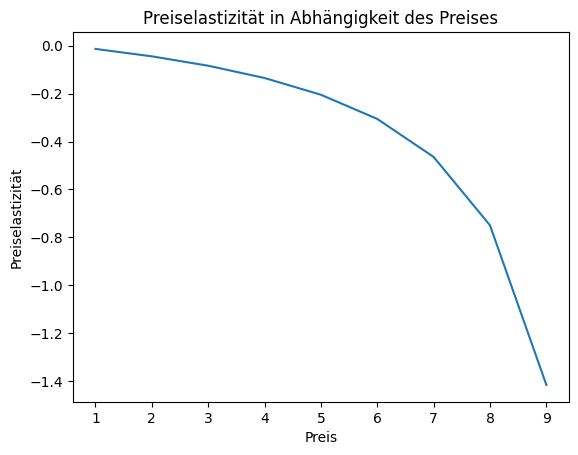

In [41]:
x = df2['Preis']
y = df2['PE']
plt.plot(x, y, label = "Preiselastizität")
plt.xlabel('Preis')
plt.ylabel('Preiselastizität')
plt.title('Preiselastizität in Abhängigkeit des Preises')
plt.show()

In [43]:
preis = [i for i in range(1,101)]

In [44]:
menge = [(-1 * p) + 100 for p in preis]

In [54]:
m2 = [(-0.5 * p) + 75 for p in preis]

In [60]:
m3 = [(-1.5 * p) + 125 for p in preis]

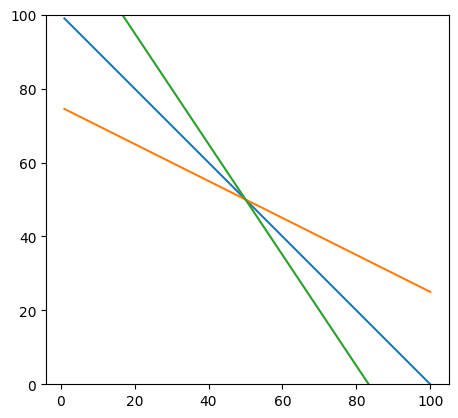

In [62]:
plt.plot(preis, menge)
plt.plot(preis, m2)
plt.plot(preis, m3)

ax = plt.gca()
ax.set_ylim([0,100])
ax.set_aspect('equal', adjustable='box')
plt.show()

In [49]:
df = pd.DataFrame(preis, columns=['Preis'])
df['Menge'] = df['Preis'] * -1 + 100
df

,Preis,Menge
0,1,99
1,2,98
2,3,97
3,4,96
4,5,95
...,...,...
95,96,4
96,97,3
97,98,2
98,99,1
